In [1]:
import pandas as pd

In [2]:
from mlxtend.frequent_patterns import apriori,association_rules


In [4]:
movie = []
with open("C:/Users/anjum/Documents/Exelir workshop/Dataset/my_movies.csv") as f:
    movie = f.read()

In [6]:
movie

'V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile\nSixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1\nGladiator,Patriot,Braveheart,,,0,1,0,0,1,0,0,0,1,0\nLOTR1,LOTR2,,,,0,0,1,0,0,1,0,0,0,0\nGladiator,Patriot,Sixth Sense,,,1,1,0,0,1,0,0,0,0,0\nGladiator,Patriot,Sixth Sense,,,1,1,0,0,1,0,0,0,0,0\nGladiator,Patriot,Sixth Sense,,,1,1,0,0,1,0,0,0,0,0\nHarry Potter1,Harry Potter2,,,,0,0,0,1,0,0,1,0,0,0\nGladiator,Patriot,,,,0,1,0,0,1,0,0,0,0,0\nGladiator,Patriot,Sixth Sense,,,1,1,0,0,1,0,0,0,0,0\nSixth Sense,LOTR,Gladiator,Green Mile,,1,1,0,0,0,0,0,1,0,1\n'

In [7]:
# splitting the data into separate transactions using separator as "\n"
movie = movie.split("\n")

In [8]:
movie_list = []
for i in movie:
    movie_list.append(i.split(","))

In [9]:
movie_list

[['V1',
  'V2',
  'V3',
  'V4',
  'V5',
  'Sixth Sense',
  'Gladiator',
  'LOTR1',
  'Harry Potter1',
  'Patriot',
  'LOTR2',
  'Harry Potter2',
  'LOTR',
  'Braveheart',
  'Green Mile'],
 ['Sixth Sense',
  'LOTR1',
  'Harry Potter1',
  'Green Mile',
  'LOTR2',
  '1',
  '0',
  '1',
  '1',
  '0',
  '1',
  '0',
  '0',
  '0',
  '1'],
 ['Gladiator',
  'Patriot',
  'Braveheart',
  '',
  '',
  '0',
  '1',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '1',
  '0'],
 ['LOTR1',
  'LOTR2',
  '',
  '',
  '',
  '0',
  '0',
  '1',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0'],
 ['Gladiator',
  'Patriot',
  'Sixth Sense',
  '',
  '',
  '1',
  '1',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0'],
 ['Gladiator',
  'Patriot',
  'Sixth Sense',
  '',
  '',
  '1',
  '1',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0'],
 ['Gladiator',
  'Patriot',
  'Sixth Sense',
  '',
  '',
  '1',
  '1',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0'],
 ['Harry Potter1',
  'Harry Potter2',
  '',
 

In [10]:
all_movie_list = [i for item in movie_list for i in item]

In [11]:
from collections import Counter,OrderedDict


In [12]:
item_frequencies = Counter(all_movie_list)

In [13]:
# after sorting
item_frequencies = sorted(item_frequencies.items(),key = lambda x:x[1])

In [14]:
item_frequencies

[('V1', 1),
 ('V2', 1),
 ('V3', 1),
 ('V4', 1),
 ('V5', 1),
 ('Harry Potter2', 2),
 ('LOTR', 2),
 ('Braveheart', 2),
 ('LOTR1', 3),
 ('Harry Potter1', 3),
 ('LOTR2', 3),
 ('Green Mile', 3),
 ('Sixth Sense', 7),
 ('Patriot', 7),
 ('Gladiator', 8),
 ('', 21),
 ('1', 30),
 ('0', 70)]

In [15]:
# Storing frequencies and items in separate variables 
frequencies = list(reversed([i[1] for i in item_frequencies]))

In [16]:
items = list(reversed([i[0] for i in item_frequencies]))


In [17]:
import matplotlib.pyplot as plt

In [18]:
movie_series  = pd.DataFrame(pd.Series(movie_list))


In [19]:
movie_series.columns = ["last"]


In [20]:
X = movie_series['last'].str.join(sep='*').str.get_dummies(sep='*')


In [21]:
X

,0,1,Braveheart,Gladiator,Green Mile,Harry Potter1,Harry Potter2,LOTR,LOTR1,LOTR2,Patriot,Sixth Sense,V1,V2,V3,V4,V5
0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0
5,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0
6,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0
7,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
8,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
9,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0


In [22]:
frequent_itemsets = apriori(X, min_support=0.003, max_len=3,use_colnames = True)


In [23]:
frequent_itemsets.sort_values('support',ascending = False,inplace=True)


Text(0, 0.5, 'support')

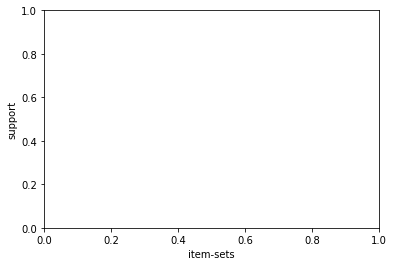

In [24]:
plt.xlabel('item-sets');plt.ylabel('support')


In [25]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [26]:
rules.sort_values('lift',ascending = False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3021,(V5),"(V3, V4)",0.083333,0.083333,0.083333,1.0,12.0,0.076389,inf
1286,"(V4, V1)",(V3),0.083333,0.083333,0.083333,1.0,12.0,0.076389,inf
1266,"(V3, V1)",(V2),0.083333,0.083333,0.083333,1.0,12.0,0.076389,inf
1265,(V5),"(Sixth Sense, V4)",0.083333,0.083333,0.083333,1.0,12.0,0.076389,inf
1264,(V4),"(Sixth Sense, V5)",0.083333,0.083333,0.083333,1.0,12.0,0.076389,inf
2694,"(Harry Potter1, Braveheart)",(V4),0.083333,0.083333,0.083333,1.0,12.0,0.076389,inf
1261,"(Sixth Sense, V5)",(V4),0.083333,0.083333,0.083333,1.0,12.0,0.076389,inf
1260,"(Sixth Sense, V4)",(V5),0.083333,0.083333,0.083333,1.0,12.0,0.076389,inf
1259,(V5),"(V3, Sixth Sense)",0.083333,0.083333,0.083333,1.0,12.0,0.076389,inf
1257,(V3),"(Sixth Sense, V5)",0.083333,0.083333,0.083333,1.0,12.0,0.076389,inf


In [28]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1),(0),0.833333,0.833333,0.833333,1.000,1.20,0.138889,inf
1,(0),(1),0.833333,0.833333,0.833333,1.000,1.20,0.138889,inf
2,(Gladiator),(0),0.666667,0.833333,0.583333,0.875,1.05,0.027778,1.333333
3,(0),(Gladiator),0.833333,0.666667,0.583333,0.700,1.05,0.027778,1.111111
4,"(1, Gladiator)",(0),0.583333,0.833333,0.583333,1.000,1.20,0.097222,inf
5,"(1, 0)",(Gladiator),0.833333,0.666667,0.583333,0.700,1.05,0.027778,1.111111
6,"(Gladiator, 0)",(1),0.583333,0.833333,0.583333,1.000,1.20,0.097222,inf
7,(1),"(Gladiator, 0)",0.833333,0.583333,0.583333,0.700,1.20,0.097222,1.388889
8,(Gladiator),"(1, 0)",0.666667,0.833333,0.583333,0.875,1.05,0.027778,1.333333
9,(0),"(1, Gladiator)",0.833333,0.583333,0.583333,0.700,1.20,0.097222,1.388889
